In [1]:
import datetime as dt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
sns.set()

In [5]:
import numpy as np

In [6]:
from matplotlib import pyplot as plt

In [7]:
col_names = ['1 oz', '1/2 oz', '1/4 oz']

In [8]:
my_df = pd.DataFrame(columns = col_names)

In [9]:
my_doc = {'1 oz':3, '1/2 oz':5, '1/4 oz':7}

In [10]:
my_df.loc[len(my_df)] = my_doc

In [11]:
my_doc

{'1 oz': 3, '1/2 oz': 5, '1/4 oz': 7}

In [12]:
#goldmünze = pd.read_csv ('GM.csv')

In [13]:
goldmünze  = pd.read_csv ('GM.csv', engine='python')

In [14]:
goldmünze

,Date,1 oz_Selling,1 oz_Buying,1/2 oz_Selling,1/2 oz_Buying,1/4 oz_Selling,1/4 oz_Buying
0,03.01.18,5632,5415,2869,2708,1461,1354
1,04.01.18,5579,5362,2842,2681,1447,1341
2,05.01.18,5608,5391,2857,2696,1455,1348
3,08.01.18,5585,5371,2845,2685,1449,1343
4,09.01.18,5592,5377,2849,2688,1451,1344
...,...,...,...,...,...,...,...
520,24.02.20,7439,7152,3790,3576,1930,1788
521,25.02.20,7365,7079,3752,3539,1911,1770
522,26.02.20,7372,7082,3756,3541,1913,1771
523,27.02.20,7380,7091,3759,3546,1915,1773


<font color='green'> 
- Pandas, seaborn und numpy werden imported
- Die Daten werden aus der csv Datei GM.csv eingelesen 
- Die Daten sind unter goldmünze gespeichert und werden hier angesehen</font>



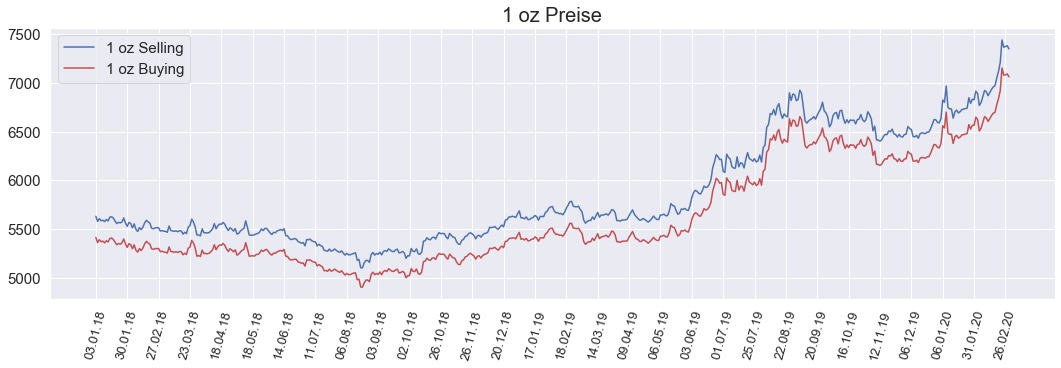

In [15]:
plt.figure(figsize = (18,5))
plt.plot(goldmünze['Date'],goldmünze['1 oz_Selling'],color = "b", label = '1 oz Selling')
plt.plot(goldmünze['Date'], goldmünze['1 oz_Buying'],color = "r", label = '1 oz Buying')
plt.legend(loc='upper left',prop={'size': 15})
plt.xticks(np.arange(len(goldmünze.Date))[::18],goldmünze.Date[::18], rotation = '75', size = 13)
plt.yticks(size = 15)
plt.title("1 oz Preise",size = 20)
plt.show ()

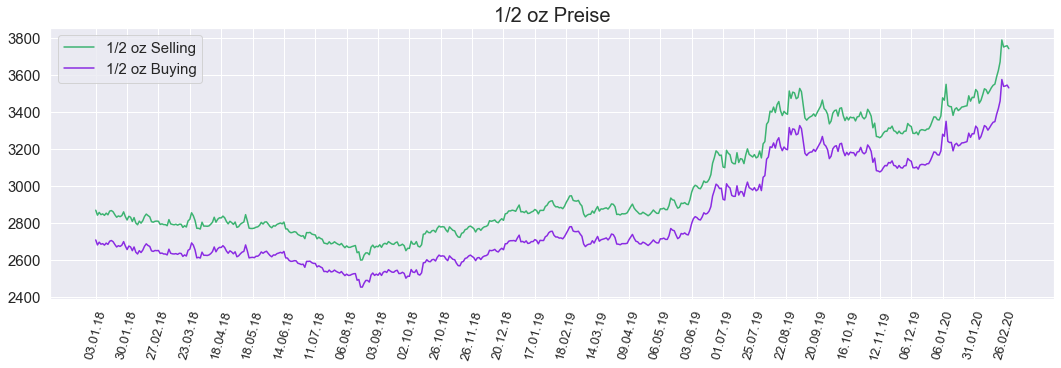

In [16]:
plt.figure(figsize = (18,5))
plt.plot(goldmünze['Date'],goldmünze['1/2 oz_Selling'],color = "#3CB371", label = '1/2 oz Selling')
plt.plot(goldmünze['Date'], goldmünze['1/2 oz_Buying'],color = "#8A2BE2", label = '1/2 oz Buying')
plt.legend(loc='upper left',prop={'size': 15})
plt.xticks(np.arange(len(goldmünze.Date))[::18],goldmünze.Date[::18], rotation = '75', size = 13)
plt.yticks(size = 15)
plt.title("1/2 oz Preise",size = 20)
plt.show ()

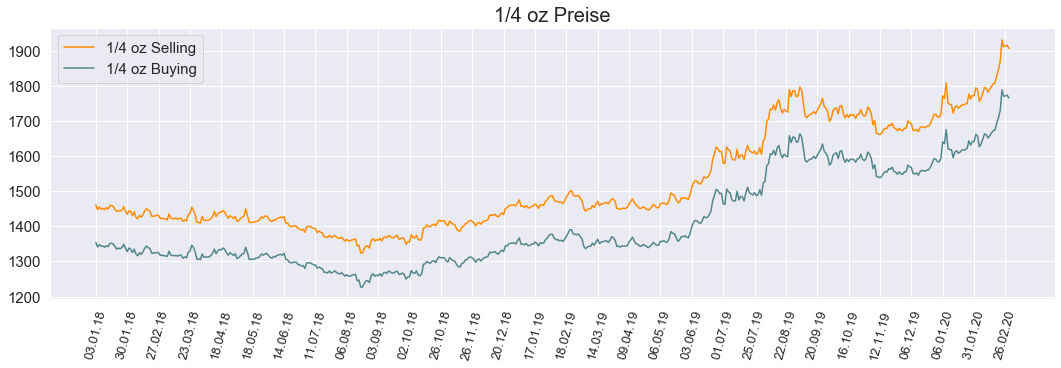

In [17]:
plt.figure(figsize = (18,5))
plt.plot(goldmünze['Date'],goldmünze['1/4 oz_Selling'],color = "#FF8C00", label = '1/4 oz Selling')
plt.plot(goldmünze['Date'], goldmünze['1/4 oz_Buying'],color = "#53868B", label = '1/4 oz Buying')
plt.legend(loc='upper left',prop={'size': 15})
plt.xticks(np.arange(len(goldmünze.Date))[::18],goldmünze.Date[::18], rotation = '75', size = 13)
plt.yticks(size = 15)
plt.title("1/4 oz Preise",size = 20)
plt.show ()

<font color='green'> 
- Die Daten für die 1 oz, 1/2 oz und 1/4 oz Münzen werden in unterschiedlichen Farben geplottet
</font>




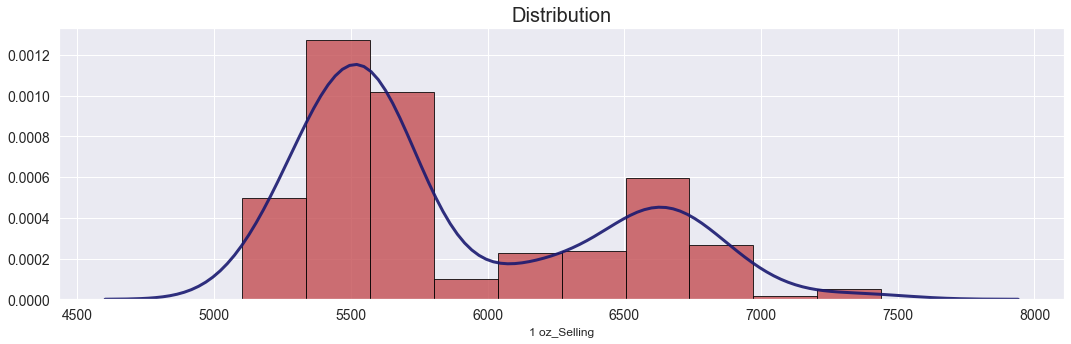

In [18]:
plt.figure(figsize = (18, 5))
sns.distplot(goldmünze['1 oz_Selling'], 
            hist_kws = {'color':'r', 'edgecolor':'black',
                       'linewidth':1, 'linestyle':'-', 'alpha':0.8},
             
            kde_kws = {'color':'#191970', 
                       'linewidth':3, 'linestyle':'-', 'alpha':0.9})

plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title("Distribution",size = 20)
plt.show()

<font color='green'> 
- Die Analyse der Daten beginnt mit dem Plotten der Verteilung der Preise für die 1 oz Münze 
- Es lässt sich hier bereits erkennen, dass die Daten linksseitig schief sind
- Somit kann eine Normalverteilung der Daten hier ausgeschlossen werden
</font>




In [19]:
from pandas import DataFrame
df = DataFrame (goldmünze,columns=['Date','1 oz_Selling'])

In [20]:
df

,Date,1 oz_Selling
0,03.01.18,5632
1,04.01.18,5579
2,05.01.18,5608
3,08.01.18,5585
4,09.01.18,5592
...,...,...
520,24.02.20,7439
521,25.02.20,7365
522,26.02.20,7372
523,27.02.20,7380


In [21]:
def df_shift(df, lag = 0, start = 1, skip = 1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols = {}
    for i in range(start, lag + 1, skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k, v in cols.items():
        columns = v
        dfn = pd.DataFrame(data = None, columns = columns, index = df.index)
        i = start - 1
        for c in columns:
            dfn[c] = df[k].shift(periods = i)
            i += skip
        df = pd.concat([df, dfn], axis = 1, join_axes = [df.index])
    return df


In [22]:
df_crosscorrelated = df_shift(
    df, lag = 15, start = 5, skip = 5, rejected_columns = ['Date']
)
df_crosscorrelated['ma5'] = df_crosscorrelated['1 oz_Selling'].rolling(5).mean()
df_crosscorrelated['ma10'] = df_crosscorrelated['1 oz_Selling'].rolling(10).mean()
df_crosscorrelated['ma13'] = df_crosscorrelated['1 oz_Selling'].rolling(13).mean()
df_crosscorrelated['ma20'] = df_crosscorrelated['1 oz_Selling'].rolling(20).mean()
df_crosscorrelated['ma25'] = df_crosscorrelated['1 oz_Selling'].rolling(25).mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


In [23]:
df_crosscorrelated

,Date,1 oz_Selling,1 oz_Selling_5,1 oz_Selling_10,1 oz_Selling_15,ma5,ma10,ma13,ma20,ma25
0,03.01.18,5632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04.01.18,5579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05.01.18,5608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08.01.18,5585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09.01.18,5592,5632.0,NaN,NaN,5599.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
520,24.02.20,7439,6970.0,6909.0,6890.0,7156.6,7034.9,6994.153846,6939.55,6897.16
521,25.02.20,7365,7050.0,6868.0,6768.0,7235.6,7080.5,7037.846154,6965.45,6923.56
522,26.02.20,7372,7116.0,6899.0,6797.0,7300.0,7130.9,7077.461538,6994.55,6949.40
523,27.02.20,7380,7208.0,6932.0,6857.0,7352.8,7179.0,7112.769231,7022.00,6975.36


<font color='green'> 
- Es wird ein Dataframe 'df' erstellt um die Daten weiterhin besser analysieren zu können
- Mit Hilfe des Codes können die Daten geshiftet und der Moving Average für unterschiedliche Lags erstellt werden
- In 'df_crosscorrelated' werden die Ergebnisse zusammengeschafft
</font>




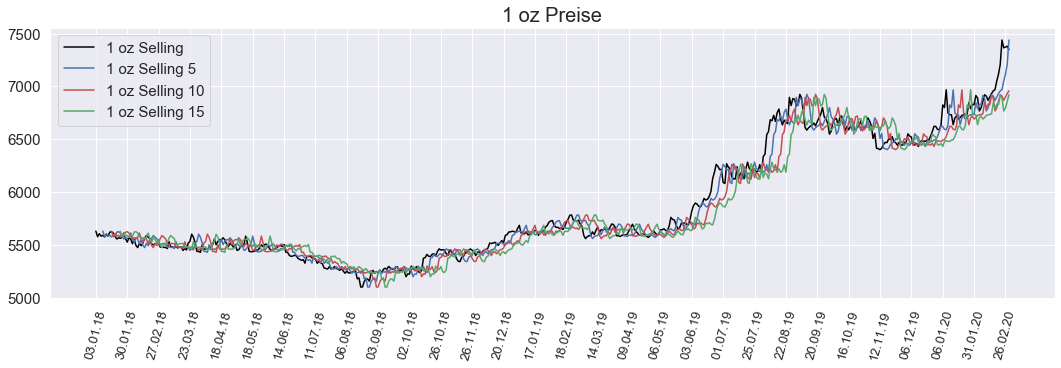

In [24]:
plt.figure(figsize = (18,5))
plt.plot(goldmünze['Date'],goldmünze['1 oz_Selling'],color = "black", label = '1 oz Selling')
plt.plot(df_crosscorrelated['Date'], df_crosscorrelated['1 oz_Selling_5'],color = "b", label = '1 oz Selling 5')
plt.plot(df_crosscorrelated['Date'], df_crosscorrelated['1 oz_Selling_10'],color = "r", label = '1 oz Selling 10')
plt.plot(df_crosscorrelated['Date'], df_crosscorrelated['1 oz_Selling_15'],color = "g", label = '1 oz Selling 15')




plt.legend(loc='upper left',prop={'size': 15})
plt.xticks(np.arange(len(goldmünze.Date))[::18],goldmünze.Date[::18], rotation = '75', size = 13)
plt.yticks(size = 15)
plt.title("1 oz Preise",size = 20)
plt.show ()

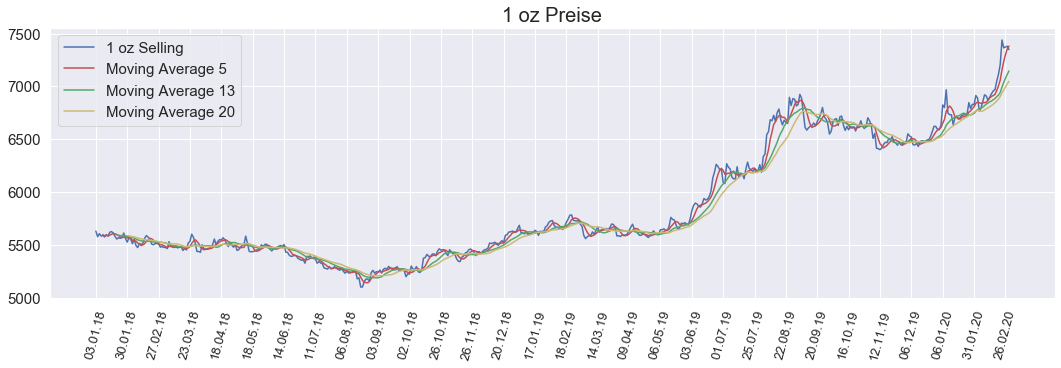

In [25]:
plt.figure(figsize = (18,5))
plt.plot(goldmünze['Date'],goldmünze['1 oz_Selling'],color = "b", label = '1 oz Selling')

plt.plot(df_crosscorrelated['Date'], df_crosscorrelated['ma5'],color = "r", label = 'Moving Average 5')
plt.plot(df_crosscorrelated['Date'], df_crosscorrelated['ma13'],color = "g", label = 'Moving Average 13')
plt.plot(df_crosscorrelated['Date'], df_crosscorrelated['ma20'],color = "y", label = 'Moving Average 20')



plt.legend(loc='upper left',prop={'size': 15})
plt.xticks(np.arange(len(goldmünze.Date))[::18],goldmünze.Date[::18], rotation = '75', size = 13)
plt.yticks(size = 15)
plt.title("1 oz Preise",size = 20)
plt.show ()


<font color='green'> 
- Anschließend werden die Daten zur besseren Übersicht getrennt als Shifted und Moving Average für verschiedene Lags   geplottet
</font>




In [26]:
df_crosscorrelated.columns[3]

'1 oz_Selling_10'

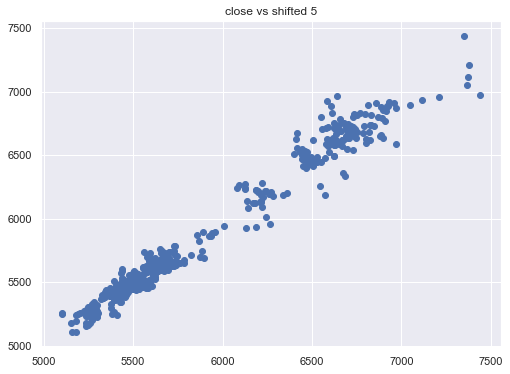

In [27]:
plt.figure(figsize = (28, 6))
plt.subplot(1, 3, 1)
plt.scatter(df_crosscorrelated['1 oz_Selling'], df_crosscorrelated['1 oz_Selling_5'])
plt.title('close vs shifted 5')
plt.show()

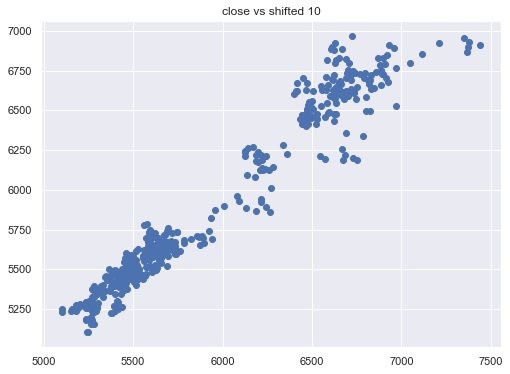

In [28]:
plt.figure(figsize = (28, 6))
plt.subplot(1, 3, 1)
plt.scatter(df_crosscorrelated['1 oz_Selling'], df_crosscorrelated['1 oz_Selling_10'])
plt.title('close vs shifted 10')
plt.show()

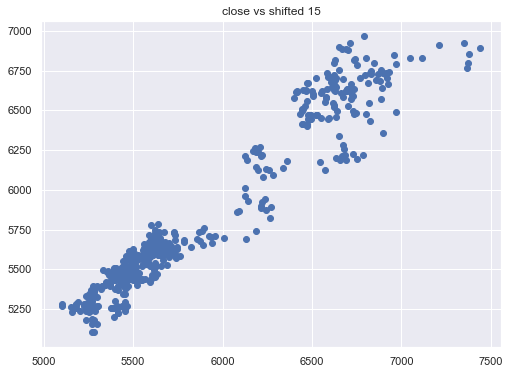

In [29]:
plt.figure(figsize = (28, 6))
plt.subplot(1, 3, 1)
plt.scatter(df_crosscorrelated['1 oz_Selling'], df_crosscorrelated['1 oz_Selling_15'])
plt.title('close vs shifted 15')
plt.show()

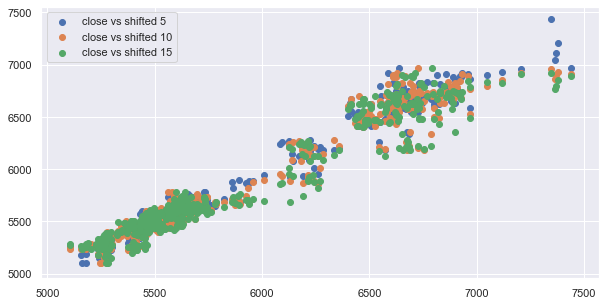

In [30]:
plt.figure(figsize = (10, 5))
plt.scatter(
    df_crosscorrelated['1 oz_Selling'],
    df_crosscorrelated['1 oz_Selling_5'],
    label = 'close vs shifted 5',
)
plt.scatter(
    df_crosscorrelated['1 oz_Selling'],
    df_crosscorrelated['1 oz_Selling_10'],
    label = 'close vs shifted 10',
)
plt.scatter(
    df_crosscorrelated['1 oz_Selling'],
    df_crosscorrelated['1 oz_Selling_15'],
    label = 'close vs shifted 15',
)
plt.legend()
plt.show()

<font color='green'> 
- Zunächst wurden die Preise der 1 oz Münze mit den geshifteten Preisen für 5, 10 und 15 Tage einzeln und dann gemeinsam geplottet
- Es lässt sich erkennen, dass die Streuung bei größerem Lag weiter auseinander geht
</font>

In [31]:
corr = df_crosscorrelated.corr()

In [32]:
corr

,1 oz_Selling,1 oz_Selling_5,1 oz_Selling_10,1 oz_Selling_15,ma5,ma10,ma13,ma20,ma25
1 oz_Selling,1.000000,0.987241,0.975670,0.966937,0.996200,0.992016,0.990024,0.984828,0.980614
1 oz_Selling_5,0.987241,1.000000,0.984847,0.974853,0.996015,0.996938,0.995560,0.992016,0.988626
1 oz_Selling_10,0.975670,0.984847,1.000000,0.985114,0.982736,0.991743,0.994422,0.994498,0.993432
1 oz_Selling_15,0.966937,0.974853,0.985114,1.000000,0.973895,0.981040,0.985394,0.992484,0.993432
ma5,0.996200,0.996015,0.982736,0.973895,1.000000,0.997634,0.995739,0.991276,0.987368
ma10,0.992016,0.996938,0.991743,0.981040,0.997634,1.000000,0.999421,0.996393,0.993406
ma13,0.990024,0.995560,0.994422,0.985394,0.995739,0.999421,1.000000,0.998229,0.995838
ma20,0.984828,0.992016,0.994498,0.992484,0.991276,0.996393,0.998229,1.000000,0.999232
ma25,0.980614,0.988626,0.993432,0.993432,0.987368,0.993406,0.995838,0.999232,1.000000


In [33]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

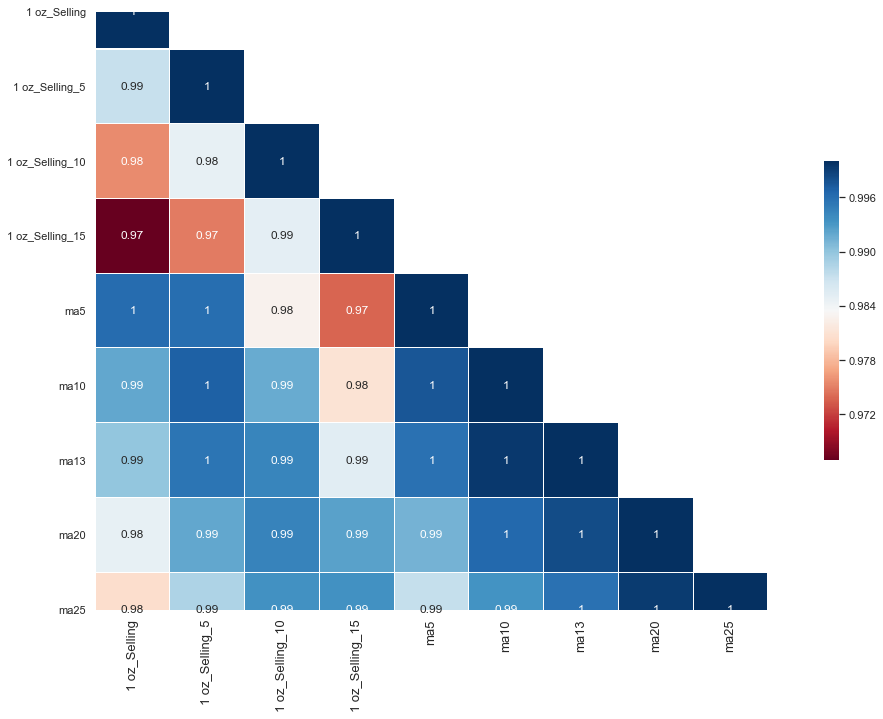

In [34]:
corr = df_crosscorrelated.corr()
sns.set(style="white")


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True


f, ax = plt.subplots(figsize=(20, 11))
plt.xticks(rotation = '90', size = 13)


cmap = plt.cm.RdBu
df_crosscorrelated.iloc[:, 1:].corr()



sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,square=True,
             linewidths=.1, cbar_kws={"shrink": .5}, annot = True)



<font color='green'> 
- Nun soll die Korrelation der Daten überprüft werden
- Dafür wird die Funkltion 'corr' verwendet
- Zur übersichtlicheren Visualisierung wird eine Maske verwendet um in der Korrelationstabelle die Werte über der Hauptdiagonalen abzuschneide, da diese lediglich über der Diagonalen gespiegelt werden
</font>

In [35]:
selling_log = np.log(goldmünze['1 oz_Selling'])

In [36]:
std_selling = ( selling_log - (np.mean( selling_log))) / np.std( selling_log)

<font color='green'> 
- Die Daten werden für die Analyse der Outliers standardisiert
</font>



In [37]:
def detect(signal, treshold = 2.0):
    detected = []
    for i in range(len(signal)):
        if np.abs(signal[i]) > treshold:
            detected.append(i)
    return detected

In [38]:
outliers = detect(std_selling)

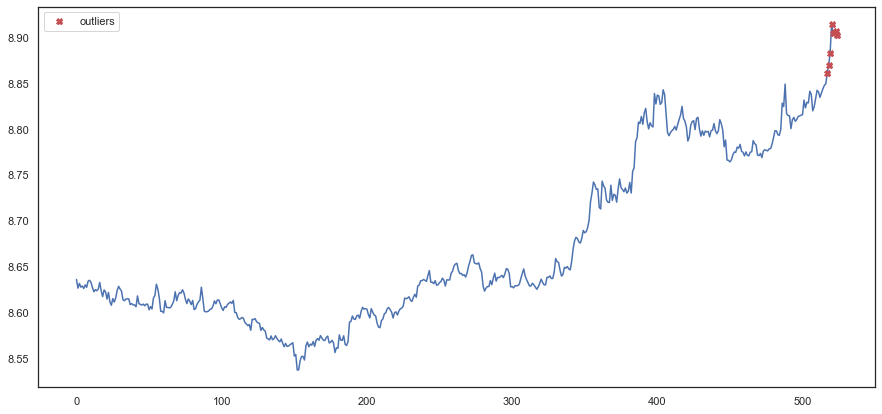

In [39]:
plt.figure(figsize = (15, 7))
plt.plot(selling_log)
plt.plot(
    np.arange(len(selling_log)),
    selling_log,
    'X',
    label = 'outliers',
    markevery = outliers,
    c = 'r',
)
plt.legend()
plt.show()

In [40]:
#Lineare Regression
#Forecast 61 Tage

from sklearn.linear_model import LinearRegression

In [41]:
sell_train = goldmünze['1 oz_Selling'][: int(0.8838095238095238 * len(goldmünze['1 oz_Selling']))]
sell_test = goldmünze['1 oz_Selling'] [int(0.8838095238095238 * len(goldmünze['1 oz_Selling'])) :]

In [42]:
61/525

0.11619047619047619

In [43]:
len(goldmünze['1 oz_Selling'])

525

In [44]:
sell_train

0      5632
1      5579
2      5608
3      5585
4      5592
       ... 
459    6469
460    6444
461    6472
462    6448
463    6444
Name: 1 oz_Selling, Length: 464, dtype: int64

In [45]:
1-0.11619047619047619

0.8838095238095238

In [46]:
forecast = len(sell_test)
forecast

61

In [47]:
linear_regression = LinearRegression().fit(
    np.arange(len(sell_train)).reshape((-1, 1)), sell_train
)
linear_future = linear_regression.predict(
    np.arange(len(sell_train) + forecast).reshape((-1, 1))
)

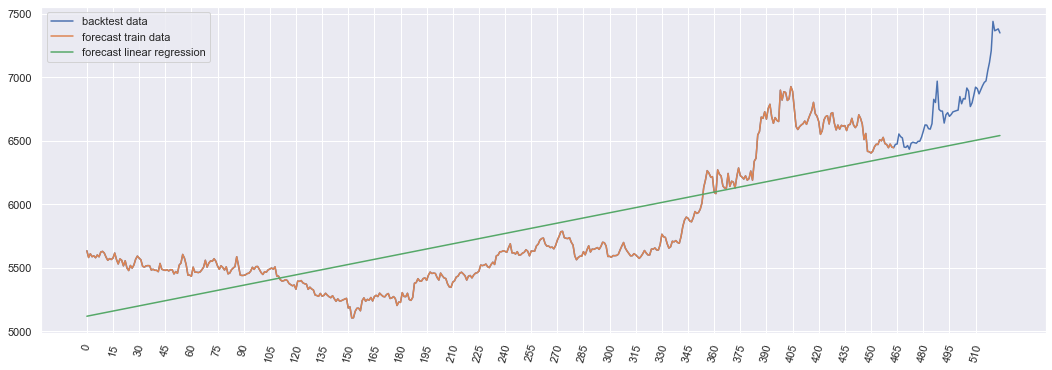

In [48]:
sns.set()
fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(goldmünze['1 oz_Selling'], label = 'backtest data')
ax.plot(sell_train, label = 'forecast train data')
ax.plot(linear_future, label = 'forecast linear regression')
plt.xticks(
    np.arange(len(goldmünze['Date']))[::15],
    np.arange(len(goldmünze['Date']))[::15],
    rotation = '75',
)
plt.legend()
plt.show()



In [49]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

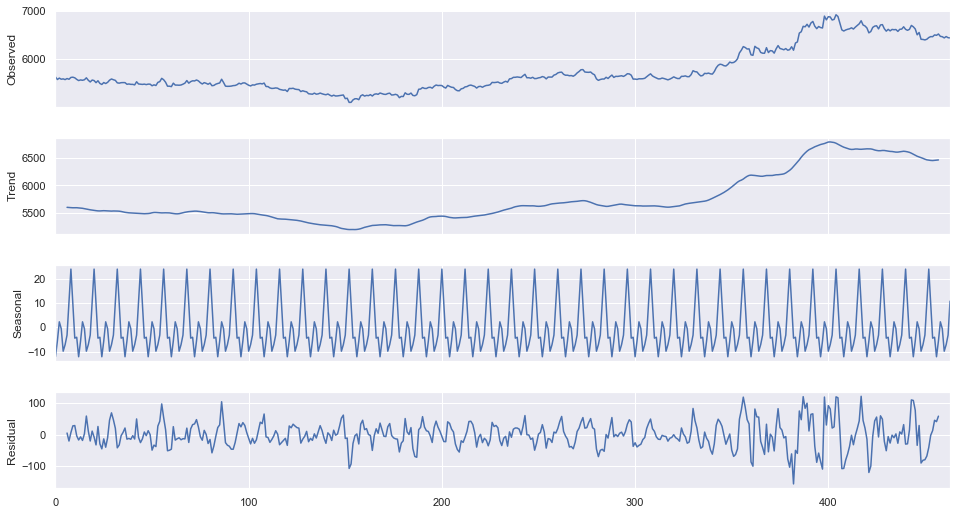

In [51]:
decomp = seasonal_decompose(sell_train, freq = 12)
fig = decomp.plot()
fig.set_size_inches(15,8)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


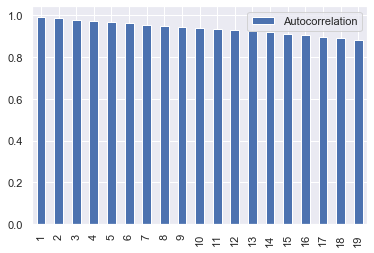

In [52]:
import pandas
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts 

acf_1= acf(sell_train) [1:20]

test_df = pd.DataFrame ([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

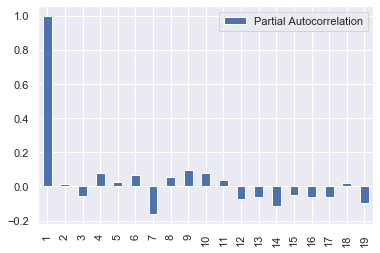

In [53]:
pacf_1= pacf(sell_train) [1:20]

test_df = pd.DataFrame ([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

In [116]:
#### PROBLEM

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(sell_train, order = (1,2,1))
arima_model = model.fit()
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.1 oz_Selling   No. Observations:                  462
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2380.278
Method:                       css-mle   S.D. of innovations             41.532
Date:                Sat, 28 Mar 2020   AIC                           4768.556
Time:                        16:39:09   BIC                           4785.099
Sample:                             2   HQIC                          4775.069
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0164      0.014      1.171      0.242      -0.011       0.044
ar.L1.D2.1 oz_Selling    -0.0314      0.047     -0.674      0.501      -0.123       0.060
ma.L1.D2

                0
count  462.000000
mean     0.730163
std     41.661114
min   -149.744069
25%    -19.728082
50%     -0.017568
75%     21.526338
max    244.882981


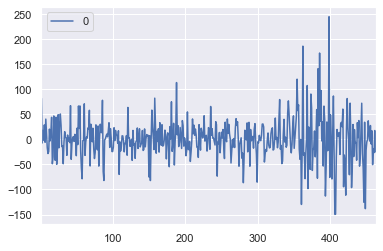

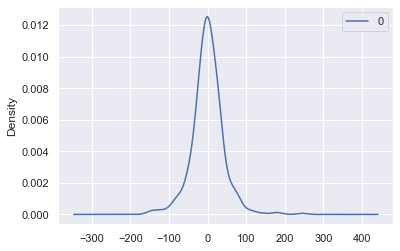

In [55]:
residuals = DataFrame(arima_model.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [56]:
# 1. Variante ARIMA

In [57]:
def objfunc(order, exog, endog):
    from statsmodels.tsa.arima_model import ARIMA
    fit = ARIMA(endog, order, exog).fit()
    return fit.aic()

In [58]:
fit = ARIMA(sell_train, order = (2, 2, 1)).fit()

In [59]:
predict = fit.predict (2, 525, typ='levels')

In [60]:
predict

2      5526.016383
3      5593.373930
4      5572.065887
5      5581.272551
6      5567.145743
          ...     
521    6793.515194
522    6800.042945
523    6806.587078
524    6813.147594
525    6819.724493
Length: 524, dtype: float64

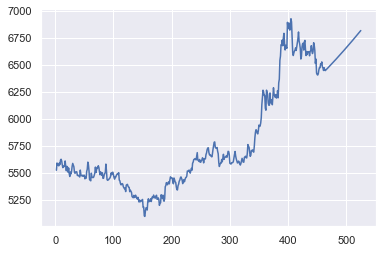

In [61]:
plt.plot(predict)

In [62]:
# 2. Variante ARIMA

In [63]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [64]:
minmax = MinMaxScaler().fit(np.array([sell_train]).T)
minmax_values = minmax.transform(np.array([sell_train]).T) 

In [66]:
model = sm.tsa.statespace.SARIMAX(minmax_values,
order=(2, 2, 1),
seasonal_order=(1, 0, 0, 12),
enforce_stationarity=True,
enforce_invertibility=True)
results = model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [67]:
predictions = results.predict(2, 525, typ='levels')

In [68]:
arima_future = minmax.inverse_transform(
    np.expand_dims(predictions, axis = 1)
)[:, 0]

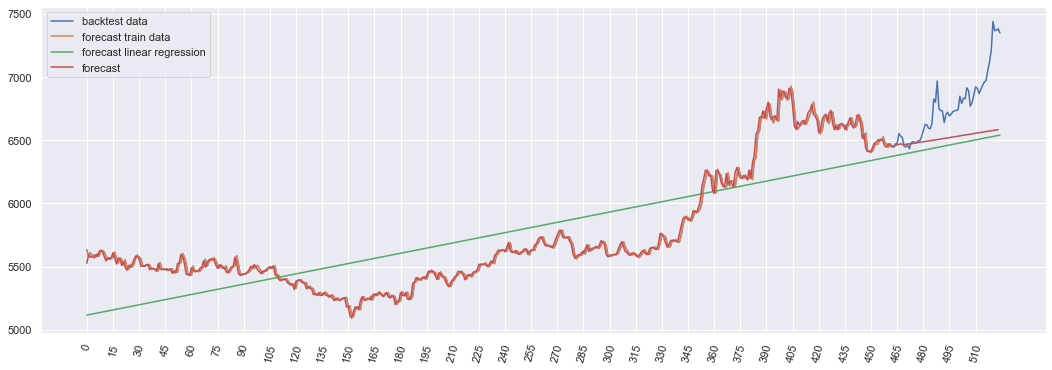

In [69]:
sns.set()
fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(goldmünze['1 oz_Selling'], label = 'backtest data')
ax.plot(sell_train, label = 'forecast train data')
ax.plot(linear_future, label = 'forecast linear regression')
ax.plot(arima_future, label = 'forecast')

plt.xticks(
    np.arange(len(goldmünze['Date']))[::15],
    np.arange(len(goldmünze['Date']))[::15],
    rotation = '75',
)
plt.legend()
plt.show()

In [70]:
#LSTM

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
training_set = df.iloc[:, 1:2].values

In [73]:
from datetime import datetime

In [74]:
df

,Date,1 oz_Selling
0,03.01.18,5632
1,04.01.18,5579
2,05.01.18,5608
3,08.01.18,5585
4,09.01.18,5592
...,...,...
520,24.02.20,7439
521,25.02.20,7365
522,26.02.20,7372
523,27.02.20,7380


In [75]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

In [76]:
df

,1 oz_Selling
Date,
2018-03-01,5632
2018-04-01,5579
2018-05-01,5608
2018-08-01,5585
2018-09-01,5592
...,...
2020-02-24,7439
2020-02-25,7365
2020-02-26,7372


In [77]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [79]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [80]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(df)

In [81]:
df_train = df[: int(0.8838095238095238 * len(df))]
df_test = df [int(0.8838095238095238 * len(df)) :]

In [82]:
X_train = []
y_train = []
for i in range(60, 525):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [83]:
%%time
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
465/465 [==============================] - 3s 6ms/step - loss: 0.0523
Epoch 2/100
465/465 [==============================] - 1s 2ms/step - loss: 0.0114
Epoch 3/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0070
Epoch 4/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0057
Epoch 5/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 6/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 7/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 8/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 9/100
465/465 [==============================] - 1s 3ms/step - loss: 0.0046
Epoch 10/100
465/465 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 11/100
465/465 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 12/100
465/465 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 13/100


In [84]:
inputs = df[len(df_train) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 121):
 X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
                                             

In [89]:
num = predicted_stock_price.tolist()

In [90]:
LSTM_future = pd.DataFrame(num)


In [91]:
LSTM_future.index += 464


In [92]:
LSTM_future

,0
464,6442.273926
465,6437.249512
466,6432.767090
467,6433.196289
468,6439.014648
...,...
520,6928.450684
521,6990.684570
522,7067.187500
523,7145.170898


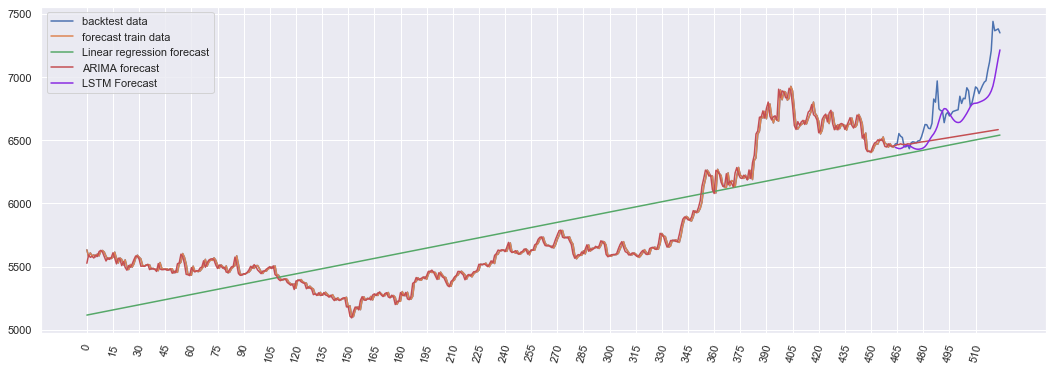

In [93]:
sns.set()
fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(goldmünze['1 oz_Selling'], label = 'backtest data')
ax.plot(sell_train, label = 'forecast train data')
ax.plot(linear_future, label = 'Linear regression forecast')
ax.plot(arima_future, label = 'ARIMA forecast')
ax.plot(LSTM_future, label = 'LSTM Forecast',color = "blueviolet")
plt.xticks(
    np.arange(len(goldmünze['Date']))[::15],
    np.arange(len(goldmünze['Date']))[::15],
    rotation = '75',
)
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

In [95]:
def calculate_accuracy(real, predict):
    r2 = r2_score(real, predict)
    if r2 < 0:
        r2 = 0

    def change_percentage(val): 
    # minmax, we know that correlation is between -1 and 1
        if val > 0:
            return val
        else:
            return val + 1

    pearson = pearsonr(real, predict)[0]
    spearman = spearmanr(real, predict)[0]
    pearson = change_percentage(pearson)
    spearman = change_percentage(spearman)
    return {
        'r2': r2 * 100,
        'pearson': pearson * 100,
        'spearman': spearman * 100,
    }


In [96]:
linear_cut = linear_future[: len(sell_train)]
arima_cut = arima_future[: len(sell_train)]
lstm_cut = LSTM_future[: len(sell_train)]
sell_train_cut = sell_train[: len(LSTM_future)]

In [97]:
# linear 

In [98]:
calculate_accuracy(sell_train, linear_cut)

{'r2': 61.77250148691557,
 'pearson': 78.59548427671629,
 'spearman': 76.03210316022103}

In [99]:
def calculate_distance(real, predict):
    mse = ((real - predict) ** 2).mean()
    rmse = np.sqrt(mse)
    return {'mse': mse, 'rmse': rmse}

In [100]:
calculate_distance(sell_train, linear_cut)

{'mse': 81941.65431166701, 'rmse': 286.2545271461519}

In [101]:
# ARIMA

In [102]:
calculate_accuracy(sell_train, arima_cut)

{'r2': 99.23206556404608,
 'pearson': 99.62212566557766,
 'spearman': 98.99713139778183}

In [103]:
calculate_distance(sell_train, arima_cut)

{'mse': 1646.0877779753996, 'rmse': 40.5720073200156}

In [120]:
type(sell_train)

pandas.core.series.Series

In [121]:
type(arima_cut)

numpy.ndarray

In [104]:
#LSTM 

In [105]:
LSTM_future.columns = ['Price']

In [106]:
LSTM_future['Price']  = LSTM_future['Price'].astype(float)

In [107]:
type(LSTM_future)

pandas.core.frame.DataFrame

In [109]:
LSTM_future_ts = pd.Series(LSTM_future['Price'])

In [110]:
calculate_accuracy(sell_train_cut, LSTM_future_ts)

{'r2': 0, 'pearson': 31.908548170379525, 'spearman': 37.002167715981884}

In [123]:
type(LSTM_future_ts)

pandas.core.series.Series

In [134]:
type(linear_cut)

numpy.ndarray

In [140]:
import numpy as np 
LSTM_future_cut = np.array(LSTM_future_ts) 

In [141]:
calculate_distance(sell_train_cut, LSTM_future_cut)

{'mse': 1316986.0097166945, 'rmse': 1147.6001087995305}